# Detector Resistivo de Temperatura utilizando Amplificado de Instrumentação e Ponte de Wheatstone
___
## Considerando a seguinte montagem:

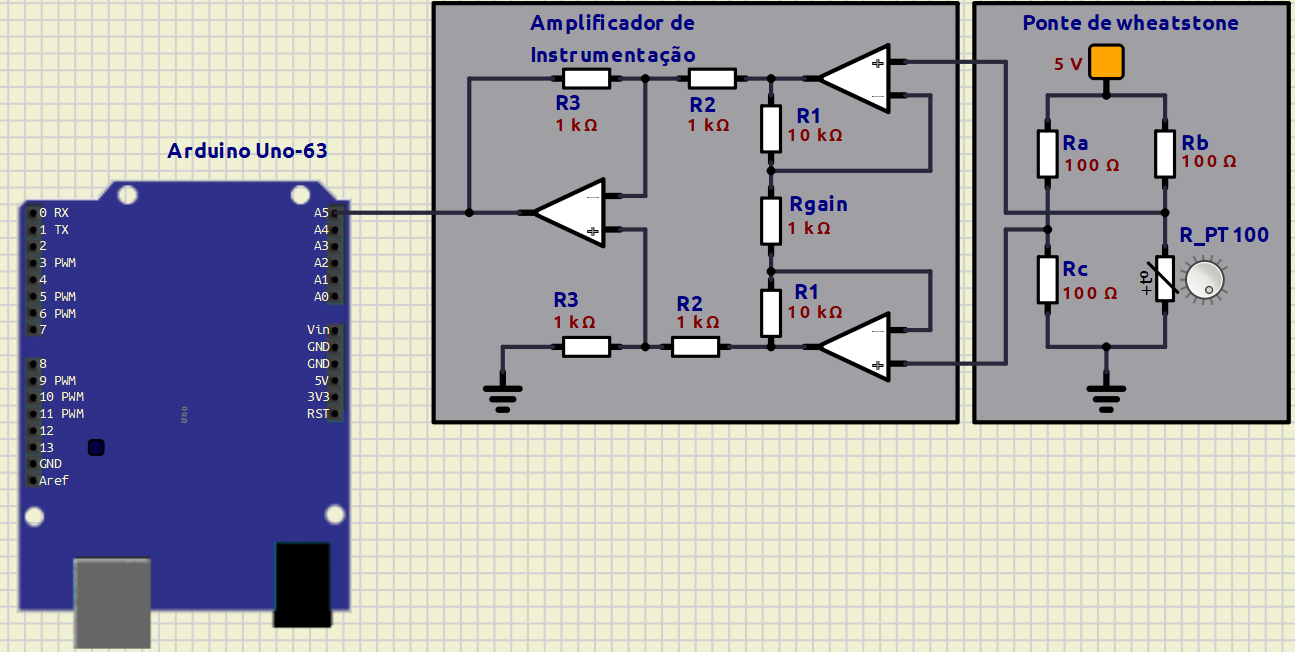

Considerando as seguintes equações:

\begin{align}
V_{a} - V_{b} = (\frac{R_{c}}{R_{c}+R_{a}} -\frac{R_{Pt100}}{R_{Pt100}+R_{b}}).V_{cc}  \quad(1)
\end{align}

\begin{align}
V_{A5} = \frac{R_{3}}{R_{2}}.(1+2.\frac{R_{1}}{R_{G}})  \quad(2)
\end{align}

\begin{align}
Bits = 1023.\frac{V_{A5}}{V_{CC}} \quad(3)
\end{align}

Juntado (1) com (2) e (3), temos:

\begin{align}
Bits = \frac{1023}{V_{cc}}.\frac{R_{3}}{R_{2}}.(1+2.\frac{R_{1}}{R_{G}}).(\frac{R_{c}}{R_{c}+R_{a}} -\frac{R_{Pt100}}{R_{Pt100}+R_{b}}).V_{cc}
\end{align}

Simplificando $V_{cc}$ e fazendo algumas simplificações, temos:

\begin{align}
Bits = \frac{1023.R_{3}}{R_{2}}.(\frac{R_{G}+2.R_{1}}{R_{G}}).(\frac{R_{c}}{R_{c}+R_{a}} -\frac{R_{Pt100}}{R_{Pt100}+R_{b}})
\end{align}

Rearranjando, temos:

\begin{align}
\frac{R_{Pt100}}{R_{Pt100}+R_{b}} = (\frac{R_{c}}{R_{c}+R_{a}}) - (\frac{Bits.R_{2}.R_{G}}{1023.R_{3}.(R_{G}+2.R_{1})})
\end{align}

Considerando k = ($\frac{R_{c}}{R_{c}+R_{a}}$) - ($\frac{Bits.R_{2}.R_{G}}{1023.R_{3}.(R_{G}+2.R_{1})}$), temos:

\begin{align}
R_{Pt100} = k.R_{Pt100}+k.R_{b}
\end{align}

\begin{align}
R_{Pt100} - k.R_{Pt100}=k.R_{b}
\end{align}

\begin{align}
R_{Pt100}(1 - k)=k.R_{b}
\end{align}

\begin{align}
R_{Pt100}=\frac{k.R_{b}}{1 - k}
\end{align}

\begin{align}
R_{Pt100}=\frac{R_{b}}{\frac{1}{k} - 1}  \quad(4)
\end{align}

Considerando ${0 \le R_{Pt100}}$ temos:

\begin{align}
0 \le \frac{R_{b}}{\frac{1}{k} - 1}
\end{align}

Diante do exposto podemos concluir que sempre devemos ter:

\begin{align}
{\frac{1}{k} - 1} > 0 && \rightarrow && 0 < k \le 1
\end{align}

Considerando que um PT100 tenha a seguinte equação de tranferência:

\begin{align}
R_{Pt100}=R_{0}.(1+\alpha_{0}.\Delta t)  \quad(5)
\end{align}

Rearranjando a equação (5) e considerando $R_{0}$=100 e $t_{0}$=0 ºC temos:

\begin{align}
t = \frac{\frac{R_{Pt100}}{100} -1}{\alpha_{0}} && (ºC)
\end{align}

Sabendo que $\alpha_{0}$ = 0,0039 temos:

In [ ]:
R1 = 2.5E3
R2 = 1E3
R3 = 1E3
Rg = 1E3

Rc = 200
Ra = 100
Rb = 100


def calc_k(Bits):
 return (Rc/(Rc+Ra))-((R2*Rg)/(1023*R3*(Rg+2*R1)))*Bits
def calc_Bits(Rpt100):
 return ((1023*R3*(Rg+2*R1))/(R2*Rg))*((Rc/(Rc+Ra))-(Rpt100/(Rpt100+Rb)))
def calc_vab(Rpt100):
 return ((Rc/(Rc+Ra))-(Rpt100/(Rpt100+Rb)))*5
def calc_Rpt100(Bits):
 return Rb/((1/calc_k(Bits))-1)
display(calc_Rpt100(512))

: 